#### Functions

In [1]:
import torch
import os
import sys
sys.path.insert(1,'../code/data_utils/SampleClass/')
from OrigamiTransform import OrigamiTransform
from Coordinates import Coordinates

In [2]:
coords_fp = '../data/samples/origami_64_no_embed_reduction/eval_mode/sample_1060_5.0_8.0_120_X.pt'

save_folder = './origami_transform/'
save = True

In [3]:
def generate_config(nbeads,nsamples=1,bond_length=1): 

    coords = torch.empty(nsamples,nbeads,3)
    coords[:,0,:] = 0 # Bead 0 at origin 
    for i in range(1,nbeads): 
        step = torch.randn(nsamples,3)
        step/= (step.square().sum(-1,keepdim=True).sqrt() * bond_length).expand(-1,3) 
        coords[:,i,:] = coords[:,i-1,:] + step

    return coords

In [4]:
origami_transform = OrigamiTransform()

In [5]:
if not os.path.exists(save_folder):
    os.makedirs(save_folder)

#### Generate random walk sample & make the plots 

In [6]:
nbeads = 64
nsamples=1
#coords = generate_config(nbeads,1)
dists = Coordinates(torch.load(coords_fp)).distances
submap = dists.fold().values
dists = dists.values
print(f'dists shape: {dists.shape}')
print(f'submap shape: {submap.shape}') 


dists shape: torch.Size([10000, 64, 64])
submap shape: torch.Size([10000, 2, 32, 32])


In [7]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
n = 6 # map selection. Unimportant unless more than one configuration was generated
vmin=0
vmax=dists[n].max()
main_cmap = 'RdBu'#'viridis'
null_cmap = 'winter'#'bone'
tert_cmap = 'spring'#'hot'

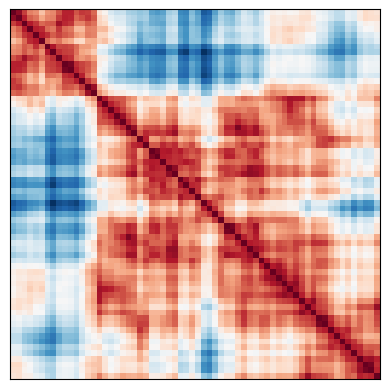

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)

im = ax.matshow(dists[n,:,:].cpu().numpy(),cmap=main_cmap,vmin=vmin,vmax=vmax)
#fig.colorbar(im)
ax.set_xticks([])
ax.set_yticks([]);

if save:
    fig.savefig(save_folder+'./full_map.pdf')

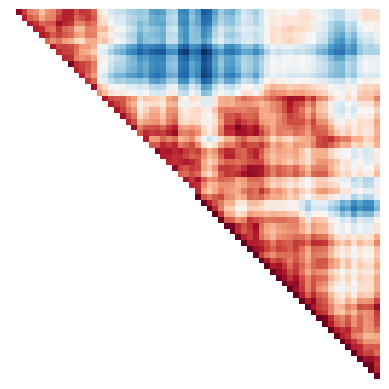

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp = dists[n,:,:].clone()
i,j = torch.triu_indices(temp.shape[-1],temp.shape[-1],1)
temp[j,i] = torch.nan
ii = torch.arange(temp.shape[-1]//2)
temp[ii,ii] = torch.nan

#im = ax.matshow(dists[n,0,:,:].cpu().numpy(),cmap=main_cmap,vmin=vmin,vmax=vmax)
im = ax.matshow(temp,cmap=main_cmap,vmin=vmin,vmax=vmax)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([]);

if save:
    fig.savefig(save_folder+'./upper_half.pdf')

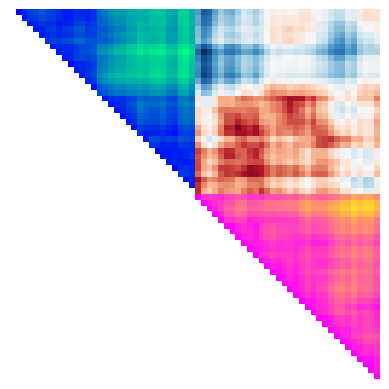

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp = dists[n,:,:].clone()
i,j = torch.triu_indices(temp.shape[-1],temp.shape[-1],1)
temp[j,i] = torch.nan
ii = torch.arange(temp.shape[-1]//2)
temp[ii,ii] = torch.nan
nn = temp.shape[-1]//2

#im = ax.matshow(dists[n,0,:,:].cpu().numpy(),cmap=main_cmap,vmin=vmin,vmax=vmax)
im = ax.matshow(temp,cmap=main_cmap,vmin=vmin,vmax=vmax)
temp[:nn,nn:] = torch.nan
im = ax.matshow(temp,cmap=null_cmap,vmin=vmin,vmax=vmax)
temp[:nn,:nn] = torch.nan
im = ax.matshow(temp,cmap=tert_cmap,vmin=vmin,vmax=vmax)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([]);

if save:
    fig.savefig(save_folder+'./segmented.pdf')

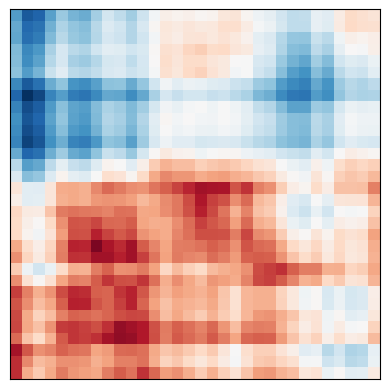

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)

im = ax.matshow(submap[n,0,:,:].cpu().numpy(),cmap=main_cmap,vmin=vmin,vmax=vmax)
ax.set_xticks([])
ax.set_yticks([]);

if save:
    fig.savefig(save_folder+'./channel_one.pdf')

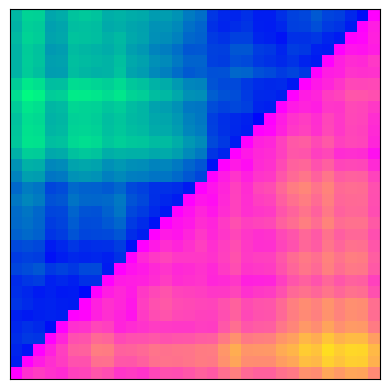

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111)

i2,j2 = torch.triu_indices(submap.shape[-1],submap.shape[-1],0)
temp = submap[n,1,:,:].clone().flipud()
temp[i2,j2] = torch.nan
temp = temp.flipud()

im = ax.matshow(submap[n,1,:,:].cpu().numpy(),cmap=tert_cmap,vmin=vmin,vmax=vmax)
im = ax.matshow(temp.cpu().numpy(),cmap=null_cmap,vmin=vmin,vmax=vmax)
ax.set_xticks([])
ax.set_yticks([]);

if save:
    fig.savefig(save_folder+'./channel_two.pdf')

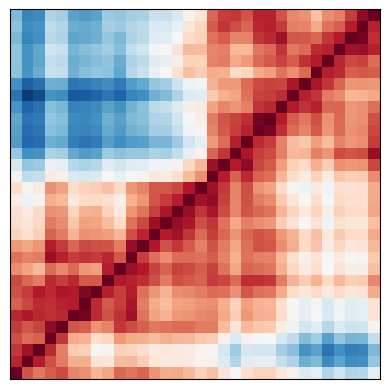

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)

im = ax.matshow(submap[n,1,:,:].cpu().numpy(),cmap=main_cmap,vmin=vmin,vmax=vmax)
ax.set_xticks([])
ax.set_yticks([]);

if save:
    fig.savefig(save_folder+'./channel_two_RdBu.pdf')

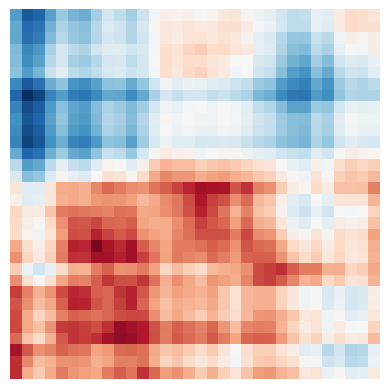

In [46]:
fig = plt.figure()
ax = fig.add_subplot(111)

im = ax.matshow(submap[n,0,:,:].cpu().numpy(),cmap=main_cmap,vmin=vmin,vmax=vmax)
ax.set_xticks([])
ax.set_yticks([]);
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

if save:
    fig.savefig(save_folder+'./channel_one_no_spine.png',bbox_inches='tight',transparent=True)

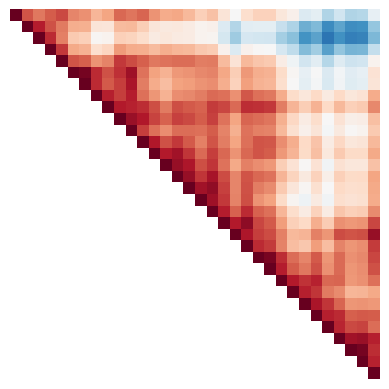

In [57]:
fig = plt.figure()
ax = fig.add_subplot(111)

i2,j2 = torch.triu_indices(submap.shape[-1],submap.shape[-1],1)
temp = submap[n,1,:,:].clone().flipud()
temp[j2,i2] = torch.nan
#temp = temp.flipud()

#im = ax.matshow(submap[n,1,:,:].cpu().numpy(),cmap=tert_cmap,vmin=vmin,vmax=vmax)
im = ax.matshow(temp.cpu().numpy(),cmap=main_cmap,vmin=vmin,vmax=vmax)
ax.set_xticks([])
ax.set_yticks([]);
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

if save:
    fig.savefig(save_folder+'./channel_two_bottom2.png',bbox_inches='tight',transparent=True)

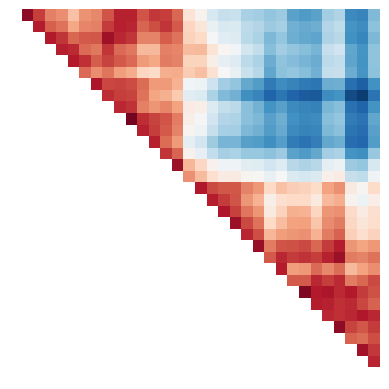

In [56]:
fig = plt.figure()
ax = fig.add_subplot(111)

i2,j2 = torch.triu_indices(submap.shape[-1],submap.shape[-1],0)
temp = submap[n,1,:,:].clone().flipud()
temp[i2,j2] = torch.nan
temp = temp.fliplr().flipud()

#im = ax.matshow(temp.cpu().numpy(),cmap=null_cmap,vmin=vmin,vmax=vmax)
im = ax.matshow(temp.cpu().numpy(),cmap=main_cmap,vmin=vmin,vmax=vmax)
ax.set_xticks([])
ax.set_yticks([]);
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

if save:
    fig.savefig(save_folder+'./channel_two_left2.png',bbox_inches='tight',transparent=True)

In [ ]:
asd

In [ ]:
chr10_30000000_to_31000000_GM.png

In [14]:
import pandas as pd

rosetta = pd.read_pickle('../data/embeddings_64_after_transformer/rosetta_stone.pkl')

In [21]:
def parse_filename(f):
    f = f.split('/')[-1].split('_')
    chrom = f[0].replace('chr','')
    start_idx = int(f[1])
    return chrom,start_idx

def get_region_idx(chrom,start_idx,rosetta=rosetta):
    for i,(_,_,start) in enumerate(rosetta[chrom]):
        if start == start_idx:
            return i
    raise Exception('Region not found!')

def get_region(chrom,start_idx):
    # Ensure the starting index is divisible by 20_000
    start_idx = start_idx//20_000 * 20_000
    
    # Account for the fact that Zhuohan's regions are only 1Mb in size
    start_idx = start_idx - 140_000

    # Get a region index with Zhuohan's identified region roughly centered
    i = 0 
    while i < 8:
        try:
            return get_region_idx(chrom,start_idx)
        except:
            start_idx+= 20_000
            i+=1
    raise Exception('No embedding found!')

regions = {}
files = os.listdir('./support/good_regions/')
files.sort()
for f in files:
    chrom,start_idx = parse_filename(f)
    if chrom not in regions:
        regions[chrom] = []
    regions[chrom].append( get_region(chrom,start_idx) )
    

In [ ]:
import shutil

IMR_directory_start = '/home/gridsan/gschuette/binz_group_shared/zlao/for_greg/IMR_size64/node_embedding/'
IMR_directory_save = '../data/cross_validation_embeddings/IMR/'

embedding_dir = '../data/embeddings_64_after_transformer/'
GM_directory_save = '../data/cross_validation_embeddings/GM/'

for chrom in regions:
    imr_dir = IMR_directory_start + f'run_scripts_{chrom}/'
    gm_embeddings = pd.read_pickle(embedding_dir + f'chrom_{chrom}.tar.gz')
    for r in regions[chrom]:
        f = f'chr_{chrom}_{r}.pt'
        shutil.copyfile(imr_dir + f, IMR_directory_save + f)

        torch.save(gm_embeddings.iloc[r].values[0],GM_directory_save + f)

In [31]:
for chrom in regions:
    imr_dir = IMR_directory_start + f'run_scripts_{chrom}/'
    for r in regions[chrom]:
        f = f'chr_{chrom}_{r}.pt'
        assert os.path.exists(IMR_directory_save + f)
        assert os.path.exists(GM_directory_save + f)